<a href="https://colab.research.google.com/github/retuyu88/digitalentkominfo/blob/master/Copy_of_%5B27_1%5D_CNN_vs_ANN_Fashion_MNIST_ADF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center">

---
# Dataset Fashion-MNIST


Jangan lupa, pastikan Colab ini berjalan dengan GPU


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=7)

---
## Load Dataset FMNIST





In [2]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
X_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
X_test.shape  = (10000, 28, 28)
y_test.shape  = (10000,)


---
## Visualisasi Data FMNIST


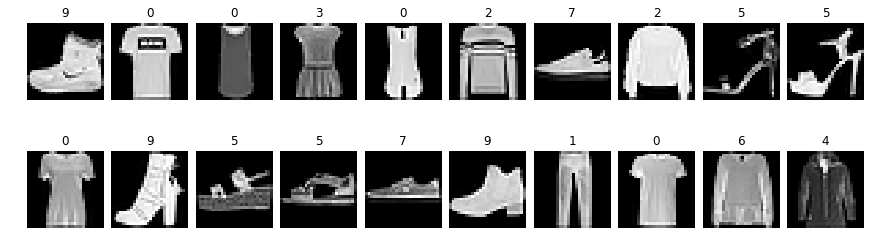

In [3]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10], cmap='gray')
        ax[j,i].set_title(y_train[i+j*10])
        ax[j,i].axis('off')
plt.show()

---
## Bagi Data Validasi
Ambil 10,000 data terakhir dari data latih menjadi data Validasi di dalam matrix `X_val` dan `y_val`

In [4]:
X_val = X_train[-10000:,:]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]

print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (10000, 28, 28)
y_val.shape   = (10000,)
X_train.shape = (50000, 28, 28)
y_train.shape = (50000,)


---
## Normalizing Data

In [5]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# mean_image = np.mean(X_train, axis = 0)
# X_train -= mean_image
# X_val -= mean_image
# X_test -= mean_image

X_train = np.expand_dims(X_train,-1)
X_val = np.expand_dims(X_val,-1)
X_test = np.expand_dims(X_test,-1)

print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)


X_train.shape = (50000, 28, 28, 1)
X_val.shape   = (10000, 28, 28, 1)
X_test.shape  = (10000, 28, 28, 1)


---
## One Hot Matrix



 Ubah vektor target `y_train`, `y_val`, dan `y_test` menjadi bentuk One-Hot Matrix

In [6]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train.ravel(), 10)
y_val_hot = to_categorical(y_val.ravel(), 10)
y_test_hot = to_categorical(y_test.ravel(), 10)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (50000, 10)
y_val_hot.shape   = (10000, 10)
y_test_hot.shape  = (10000, 10)


---

# Three-Layer Neural Network

Berikutnya, mari kita bangun Jaringan Saraf Tiruan sedalam 3 layer untuk mengklasifikasikan dataset FMNIST ini


---
## Import Modul



In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

num_data    = X_train.shape[0]
X_dim       = X_train.shape[1]
num_classes = y_train_hot.shape[1]

---
## Model Neural Network


In [8]:
# create model compact sequential

model_ann = Sequential([
  Flatten(input_shape=(28,28,1)),
  Dense(500, activation="relu"),
  Dense(200, activation="relu"),
  Dense(num_classes, activation="softmax")
])

model_ann.summary()

W0806 02:00:47.785572 139955706967936 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


---
## Melatih Model

In [9]:
# Compile model
model_ann.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 15
batch_size = 1000

hist_ann = model_ann.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 - 1s - loss: 27.7612 - acc: 0.6572 - val_loss: 4.6188 - val_acc: 0.7897
Epoch 2/15
50000/50000 - 0s - loss: 3.4824 - acc: 0.7980 - val_loss: 2.8078 - val_acc: 0.8006
Epoch 3/15
50000/50000 - 0s - loss: 2.9863 - acc: 0.7995 - val_loss: 2.7867 - val_acc: 0.7949
Epoch 4/15
50000/50000 - 0s - loss: 1.9807 - acc: 0.8222 - val_loss: 2.8744 - val_acc: 0.7785
Epoch 5/15
50000/50000 - 0s - loss: 1.5967 - acc: 0.8318 - val_loss: 1.5930 - val_acc: 0.8322
Epoch 6/15
50000/50000 - 0s - loss: 1.3758 - acc: 0.8395 - val_loss: 1.5601 - val_acc: 0.8311
Epoch 7/15
50000/50000 - 0s - loss: 1.2507 - acc: 0.8429 - val_loss: 2.4393 - val_acc: 0.7657
Epoch 8/15
50000/50000 - 0s - loss: 1.1238 - acc: 0.8523 - val_loss: 1.5250 - val_acc: 0.8230
Epoch 9/15
50000/50000 - 0s - loss: 0.8657 - acc: 0.8627 - val_loss: 1.3749 - val_acc: 0.8262
Epoch 10/15
50000/50000 - 0s - loss: 0.8519 - acc: 0.8631 - val_loss: 1.1452 - val_acc: 0.8488
Epoch 11

---
## Evaluasi Model


In [10]:
scores_ann = model_ann.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_ann[1]*100))

10000/10000 [==============================] - 1s 57us/sample - loss: 1.0423 - acc: 0.8396

Model Accuracy: 83.96%


---

# Three-Layer Convolutional Neural Network
Sebagai perbandingan, mari kita bangun Convolutional Neural Network yang juga hanya 3 layer


---
## Import Modul



In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

---
## Model Neural Network


In [13]:
# create model compact sequential

model_cnn = Sequential([
  Conv2D(32,(5,5),input_shape=(28,28,1), padding='same', activation="relu"),
  Conv2D(32,(5,5), padding='same', activation="relu"),
  MaxPooling2D(),
  Flatten(),
  Dense(num_classes, activation="softmax")
])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                62730     
Total params: 89,194
Trainable params: 89,194
Non-trainable params: 0
_________________________________________________________________


---
## Melatih Model

In [14]:
# Compile model
model_cnn.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 15
batch_size = 1000

hist_cnn = model_cnn.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 - 5s - loss: 4.0931 - acc: 0.6346 - val_loss: 0.5274 - val_acc: 0.8091
Epoch 2/15
50000/50000 - 2s - loss: 0.4395 - acc: 0.8462 - val_loss: 0.3952 - val_acc: 0.8617
Epoch 3/15
50000/50000 - 2s - loss: 0.3536 - acc: 0.8760 - val_loss: 0.3584 - val_acc: 0.8753
Epoch 4/15
50000/50000 - 2s - loss: 0.3151 - acc: 0.8891 - val_loss: 0.3355 - val_acc: 0.8821
Epoch 5/15
50000/50000 - 2s - loss: 0.2864 - acc: 0.8984 - val_loss: 0.3159 - val_acc: 0.8907
Epoch 6/15
50000/50000 - 2s - loss: 0.2675 - acc: 0.9042 - val_loss: 0.3081 - val_acc: 0.8920
Epoch 7/15
50000/50000 - 2s - loss: 0.2489 - acc: 0.9111 - val_loss: 0.3045 - val_acc: 0.8917
Epoch 8/15
50000/50000 - 2s - loss: 0.2331 - acc: 0.9169 - val_loss: 0.2985 - val_acc: 0.8945
Epoch 9/15
50000/50000 - 2s - loss: 0.2216 - acc: 0.9214 - val_loss: 0.2964 - val_acc: 0.8958
Epoch 10/15
50000/50000 - 2s - loss: 0.2085 - acc: 0.9257 - val_loss: 0.2987 - val_acc: 0.8934
Epoch 11/

---
## Evaluasi Model


In [15]:
scores_cnn = model_cnn.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_cnn[1]*100))

10000/10000 [==============================] - 1s 80us/sample - loss: 0.3122 - acc: 0.8948

Model Accuracy: 89.48%


---
# Perbandingan ANN dan CNN

Sekarang, mari kita investigasi performa ANN dan CNN

---
## Jumlah Parameter

In [16]:
print('model ANN:')
model_ann.summary()

print('\n\nmodel CNN:')
model_cnn.summary()

model ANN:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


model CNN:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
____

**ANN memiliki parameter hingga 4x lebih banyak dari CNN**

In [17]:
print('total parameter ANN:', f'{ model_ann.count_params():,}')
print('total parameter CNN:', f'{ model_cnn.count_params():,}')

total parameter ANN: 494,710
total parameter CNN: 89,194


---
## Grafik Hasil Pelatihan

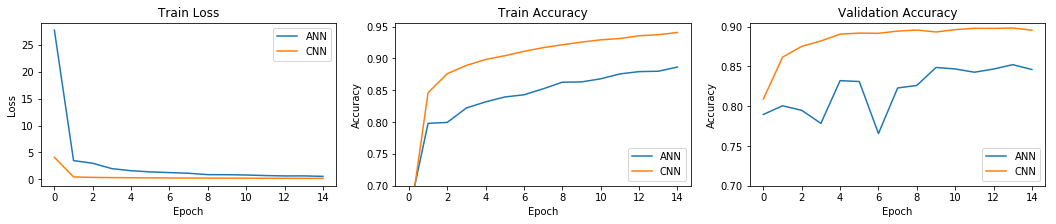

In [18]:
fig, ax = plt.subplots(1,3,figsize=(18,3))

ax[0].plot(hist_ann.history['loss'])
ax[0].plot(hist_cnn.history['loss'])
ax[0].set_title('Train Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['ANN', 'CNN'], loc='upper right')

ax[1].plot(hist_ann.history['acc'])
ax[1].plot(hist_cnn.history['acc'])
ax[1].set_title('Train Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim(bottom=.7)
ax[1].legend(['ANN', 'CNN'], loc='lower right')

ax[2].plot(hist_ann.history['val_acc'])
ax[2].plot(hist_cnn.history['val_acc'])
ax[2].set_title('Validation Accuracy')
ax[2].set_ylabel('Accuracy')
ax[2].set_xlabel('Epoch')
ax[2].set_ylim(bottom=.7)
ax[2].legend(['ANN', 'CNN'], loc='lower right')
plt.show()

---
## Akurasi Data Uji

In [19]:
print("Akurasi ANN: %.2f%%" % (scores_ann[1]*100))
print("Akurasi CNN: %.2f%%" % (scores_cnn[1]*100))

Akurasi ANN: 83.96%
Akurasi CNN: 89.48%


---
## Pengecekan Overfitting

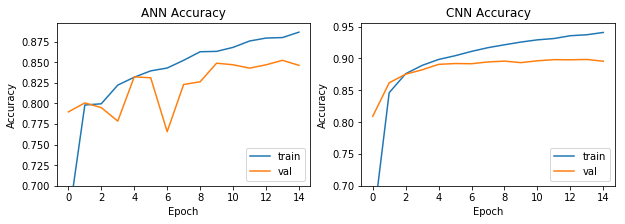

In [20]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].plot(hist_ann.history['acc'])
ax[0].plot(hist_ann.history['val_acc'])
ax[0].set_title('ANN Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylim(bottom=.7)
ax[0].legend(['train', 'val'], loc='lower right')

ax[1].plot(hist_cnn.history['acc'])
ax[1].plot(hist_cnn.history['val_acc'])
ax[1].set_title('CNN Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim(bottom=.7)
ax[1].legend(['train', 'val'], loc='lower right')
plt.show()

Makin besar gap antara akurasi training dan validasi menandakan makin rentan terhadap overfitting

---
# Kesimpulan
* CNN memiliki parameter yang jauh lebih sedikit dari ANN, namun memiliki akurasi akhir yang lebih baik
* CNN Lebih tangguh terhadap *Overfitting*

<p>Copyright &copy; 2019 <a href=https://www.linkedin.com/in/andityaarifianto/>ADF</a> </p>